In [23]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"F:\sustain\data\extracted\extracted_features.csv", index_col=0)

In [8]:
ref = df.iloc[:, 1:]
nbi = df.iloc[:, 0]

In [36]:
def spectral_index_cor(ind_type):
    ind_df = pd.DataFrame(
        index=ref.columns,
        columns=ref.columns,
        data=np.nan
    )
    for i, row in enumerate(ind_df.index):
        for j, col in enumerate(ind_df.columns):
            a = ref[row]
            b = ref[col]
            if ind_type == 'ndsi':
                ind_val = (a-b)/(a+b)
            elif ind_type == 'ri':
                ind_val = a/b
            elif ind_type == 'di':
                ind_val = a-b
            ind_df.iloc[i,j] = pearsonr(ind_val, nbi.values)[0]
    return ind_df


In [37]:
ndsi = spectral_index_cor('ndsi')
ri = spectral_index_cor('ri')
di = spectral_index_cor('di')

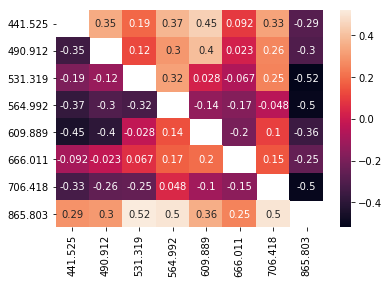

In [38]:
sns.heatmap(ndsi, annot=True)

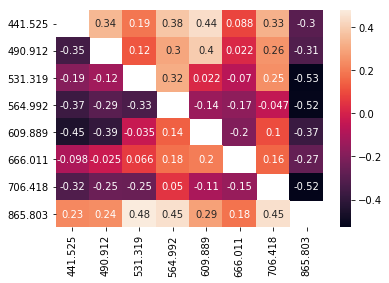

In [39]:
sns.heatmap(ri, annot=True)

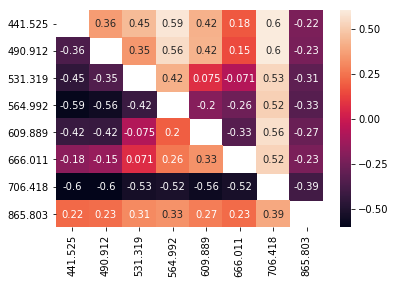

In [40]:
sns.heatmap(di, annot=True)